EDA

### EDA of house price

In [2]:
pip install geopandas matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd

# 读取Excel文件
price_data = pd.read_excel('finaldata.xlsx')

# 打印列名
print(price_data.columns)


Index([           'MSOA code', 'Local authority code', 'Local authority name',
                  'MSOA name',                   2000,                   2001,
                         2002,                   2003,                   2004,
                         2005,                   2006,                   2007,
                         2008,                   2009,                   2010,
                         2011,                   2012,                   2013,
                         2014,                   2015,                   2016,
                         2017,                   2018,                   2019,
                         2020,                   2021,          'Unnamed: 26',
               '11disability',          '11fertility',          '11household',
                   '11level4',  '11populationdensity',         '11employment',
                'Unnamed: 33',         '21disability',          '21fertility',
                '21household',             '21level4

In [40]:
import pandas as pd

# 载入房价数据
price_data = pd.read_excel('finaldata.xlsx')

# 确保所有年份的数据都是数值型，并填充NaN为0
years = [2001, 2011, 2021]
for year in years:
    price_data[year] = pd.to_numeric(price_data[year], errors='coerce').fillna(0)

# 计算统计变量
summary_stats = price_data[years].describe().transpose()

# 禁用科学计数法显示
pd.options.display.float_format = '{:.2f}'.format

# 输出统计变量表格
print(summary_stats)

# 保存统计变量到CSV文件
summary_stats.to_csv('summary_statistics.csv', index=True)


      count      mean       std       min       25%       50%       75%  \
2001 983.00 195012.79 107573.93  74340.03 126934.88 164242.27 225055.88   
2011 983.00 372651.37 247305.90 131561.76 229079.71 294351.46 418604.64   
2021 983.00 650296.61 398425.13 269224.32 430177.71 537425.93 724448.87   

            max  
2001 1074432.94  
2011 2603411.80  
2021 3748436.15  


### 跑一些时间序列图，statistic，corrrelation的图

In [46]:
import pandas as pd

# 加载数据
file_path = 'finaldata.xlsx'
data = pd.read_excel(file_path)

# 提取房价数据和社会经济指标数据的列名
price_columns = data.columns[4:24]  # 假设房价数据在第5到第24列之间
socioeconomic_columns = data.columns[24:]  # 社会经济指标数据在第25列之后

# 提取相关数据
price_data = data[price_columns]
socioeconomic_data = data[socioeconomic_columns]

# 计算总结统计数据
price_summary = price_data.describe()
socioeconomic_summary = socioeconomic_data.describe()

# 显示结果
print("Mean house price data summary statistics：")
print(price_summary)
print("\n Summary statistics on socio-economic indicators：")
print(socioeconomic_summary)
#对应的excel的图在fyp文字的文件夹中

Mean house price data summary statistics：
           2000       2001      2002      2003       2004       2005  \
count    983.00     983.00    983.00    983.00     983.00     983.00   
mean  174787.37  195012.79 223133.15 245924.49  266167.17  276539.27   
std   100794.38  107573.93 109640.39 110675.97  121438.38  129896.51   
min    51495.83   74340.03  90072.50 120217.14  135149.79  135488.18   
25%   111537.82  126934.88 153754.95 177800.48  193062.92  199146.29   
50%   144224.61  164242.27 190847.20 213323.36  228154.00  236024.22   
75%   206781.82  225055.88 255539.09 272509.70  296150.73  305539.14   
max   976483.32 1074432.94 962014.64 977209.88 1252544.87 1394139.69   

            2006       2007       2008       2009       2010       2011  \
count     983.00     983.00     983.00     983.00     983.00     983.00   
mean   298178.87  341645.44  348097.01  325501.52  362203.68  372651.37   
std    146003.55  182137.53  211131.83  192213.29  231230.90  247305.90   
min    14

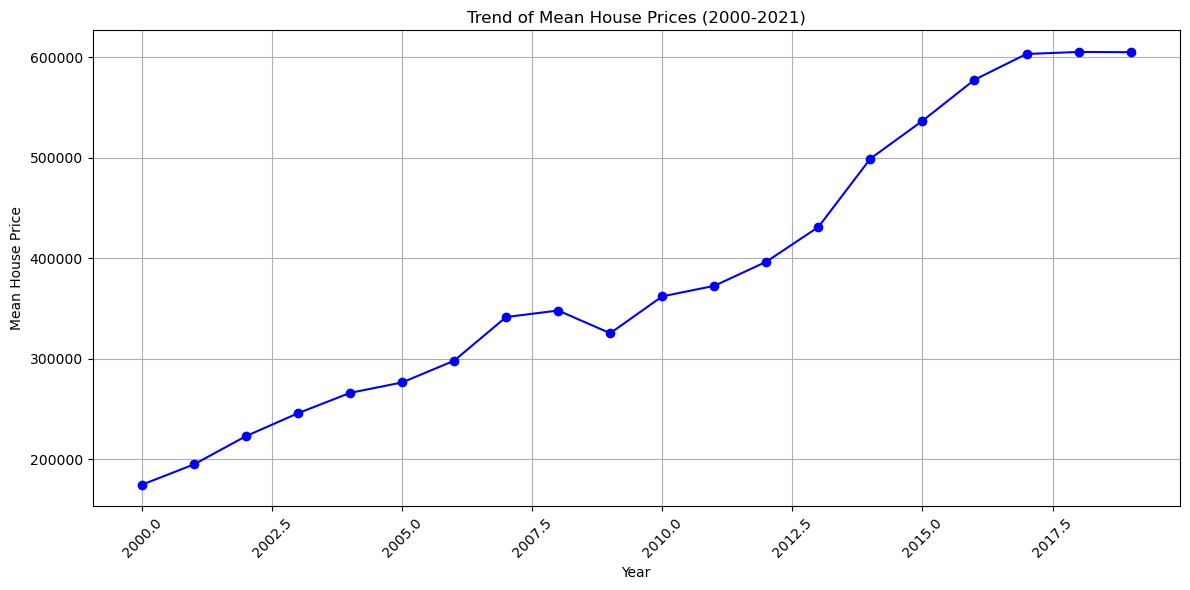

In [47]:
import matplotlib.pyplot as plt

# Calculate the mean house prices for each year
mean_prices = price_data.mean()

# Plot the trends of house prices over the years
plt.figure(figsize=(12, 6))
plt.plot(mean_prices.index, mean_prices.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Mean House Prices (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Mean House Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


Summary statistic for 2011 and 2021

In [60]:
import pandas as pd

# 加载数据
file_path = 'finaldata.xlsx'
data = pd.read_excel(file_path)

# 选择相关的列：2011年和2021年的平均房价，以及2011年和2021年的经济指标
columns_of_interest_2011 = [
    2011,  # 2011年的平均房价
    '11disability',  # 2011年的残疾人比率
    '11fertility',   # 2011年的生育率
    '11household',   # 2011年的户型分布
    '11level4',      # 2011年的高等教育比率
    '11employment'   # 2011年的就业率
]

columns_of_interest_2021 = [
    2021,  # 2021年的平均房价
    '21disability',  # 2021年的残疾人比率
    '21fertility',   # 2021年的生育率
    '21household',   # 2021年的户型分布
    '21level4',      # 2021年的高等教育比率
    '21employment'   # 2021年的就业率
]

# 提取2011年的数据
data_2011 = data[columns_of_interest_2011]

# 提取2021年的数据
data_2021 = data[columns_of_interest_2021]

# 计算描述性统计
summary_2011 = data_2011.describe()
summary_2021 = data_2021.describe()

# 输出描述性统计结果
print("Summary Statistics for 2011:\n", summary_2011)
print("\nSummary Statistics for 2021:\n", summary_2021)


Summary Statistics for 2011:
             2011  11disability  11fertility  11household  11level4  \
count     983.00        983.00       983.00       983.00    983.00   
mean   372651.37          4.21         1.52         8.29     37.38   
std    247305.90          1.26         0.38         2.60     13.27   
min    131561.76          0.62         0.33         3.03     11.14   
25%    229079.71          3.30         1.26         6.19     26.89   
50%    294351.46          4.25         1.51         8.09     35.18   
75%    418604.64          4.98         1.75        10.26     46.57   
max   2603411.80          8.32         3.07        16.87     71.37   

       11employment  
count        983.00  
mean          71.55  
std            4.99  
min           50.56  
25%           68.61  
50%           71.56  
75%           74.71  
max           86.36  

Summary Statistics for 2021:
             2021  21disability  21fertility  21household  21level4  \
count     983.00        983.00       983

### 处理median house price

In [ ]:
import pandas as pd
import numpy as np

# 指定数据文件的路径（当前目录中）
file_path = 'filtered3_final.xlsx'
output_file_path = 'filled_filtered3_final.xlsx'

# 加载Excel数据文件
data = pd.read_excel(file_path)

# 替换":"为NaN，以便进行缺失值处理
data.replace(':', np.nan, inplace=True)

# 转换数据类型为数值型，以便进行计算和填充
data.iloc[:, 4:] = data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

# 填充所有年份的中位数价格，只填充缺失值
median_price_columns = data.columns[4:]  # 从第5列开始到最后一列
for col in median_price_columns:
    data[col] = data[col].fillna(method='ffill').fillna(method='bfill')

# 保存处理后的数据到新的Excel文件
data.to_excel(output_file_path, index=False)

print(f"处理后的数据已保存到 {output_file_path}")

#之后提取出来属于2000-2021的中位数房价，并粘贴到finaldata最终数据表格中这个表格中

### pool correlation matrix and cross sesion matrix

### EDA maps using 3 methods

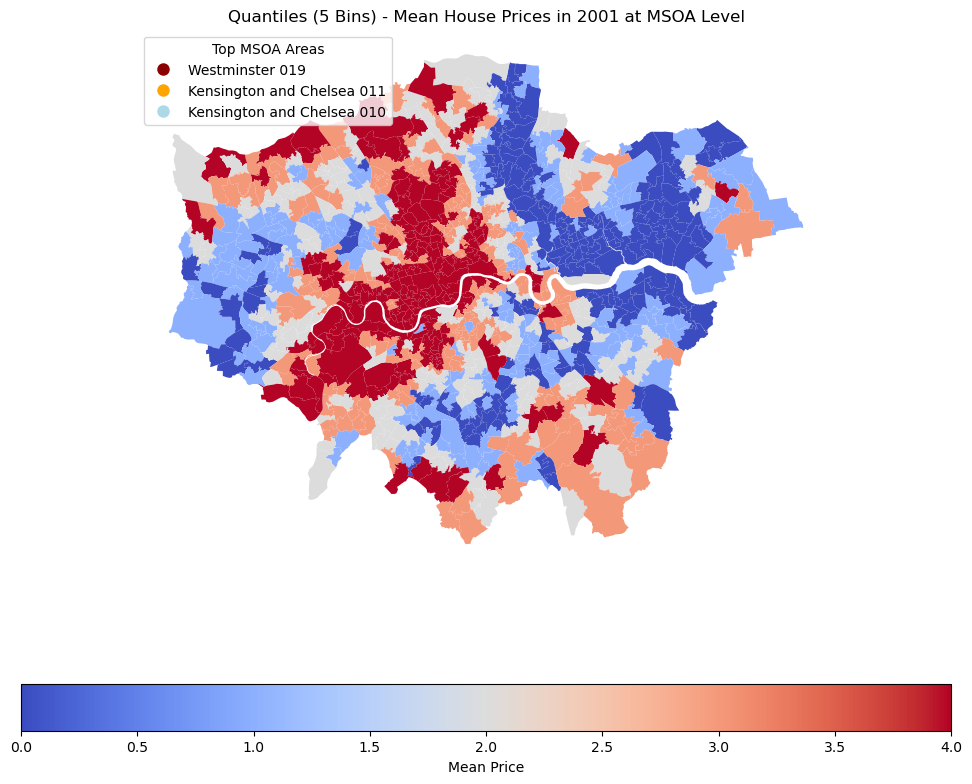

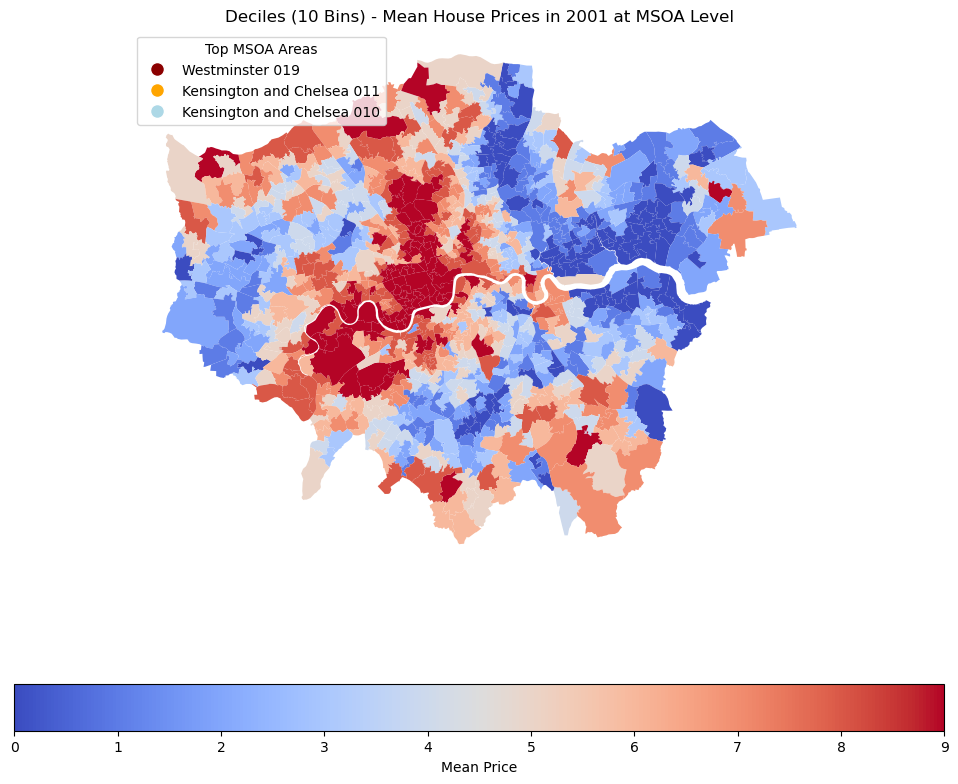

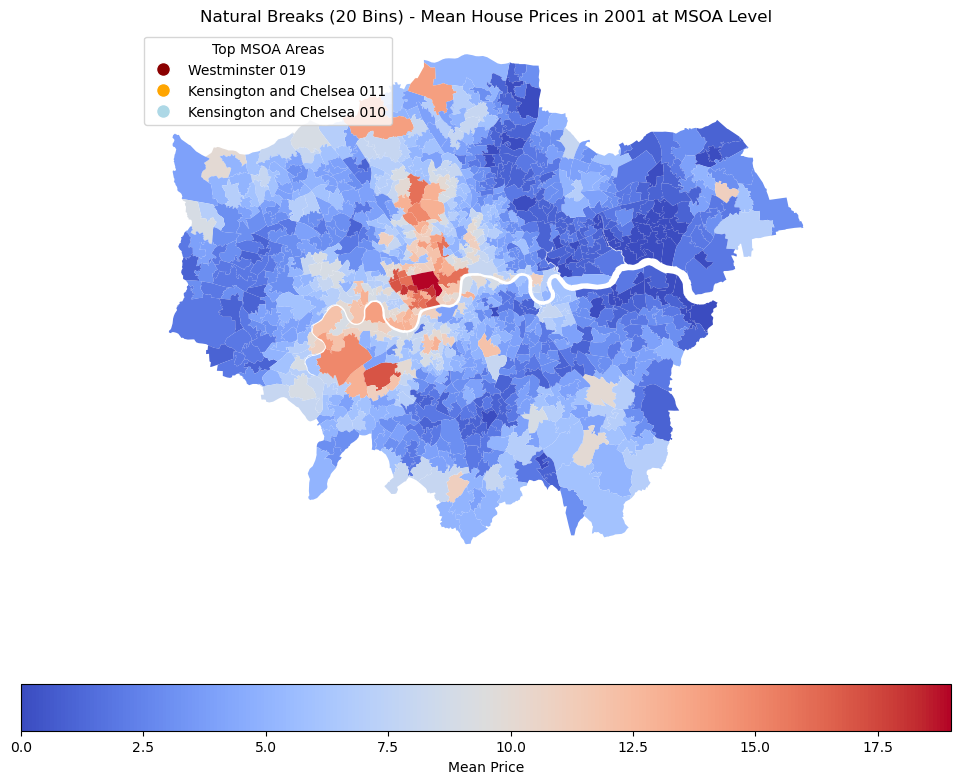

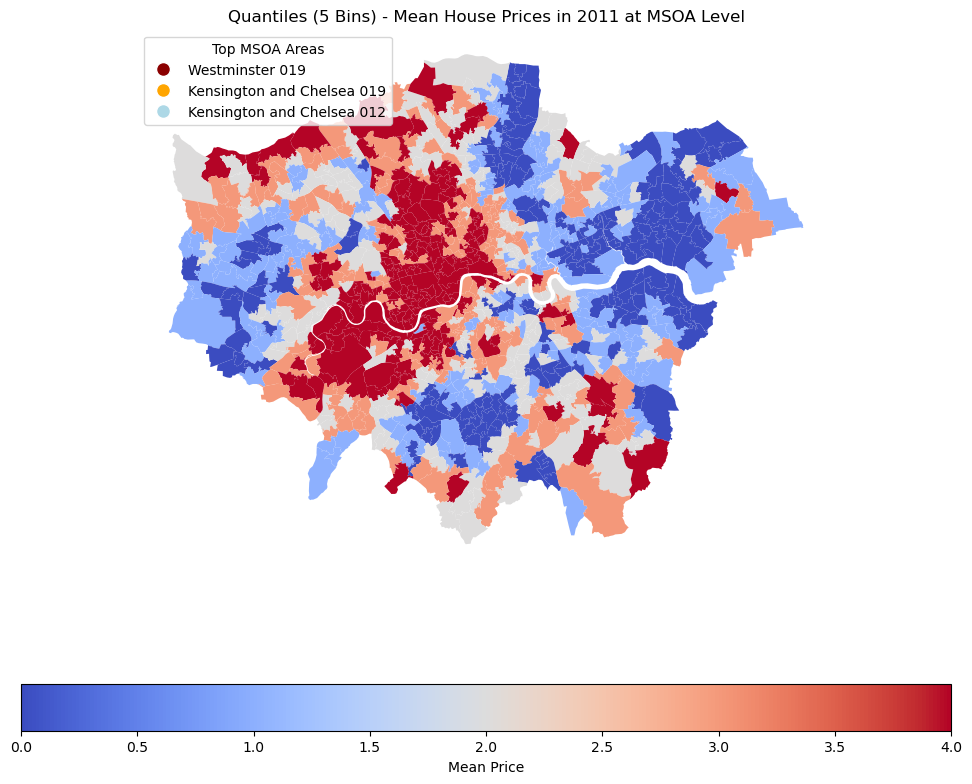

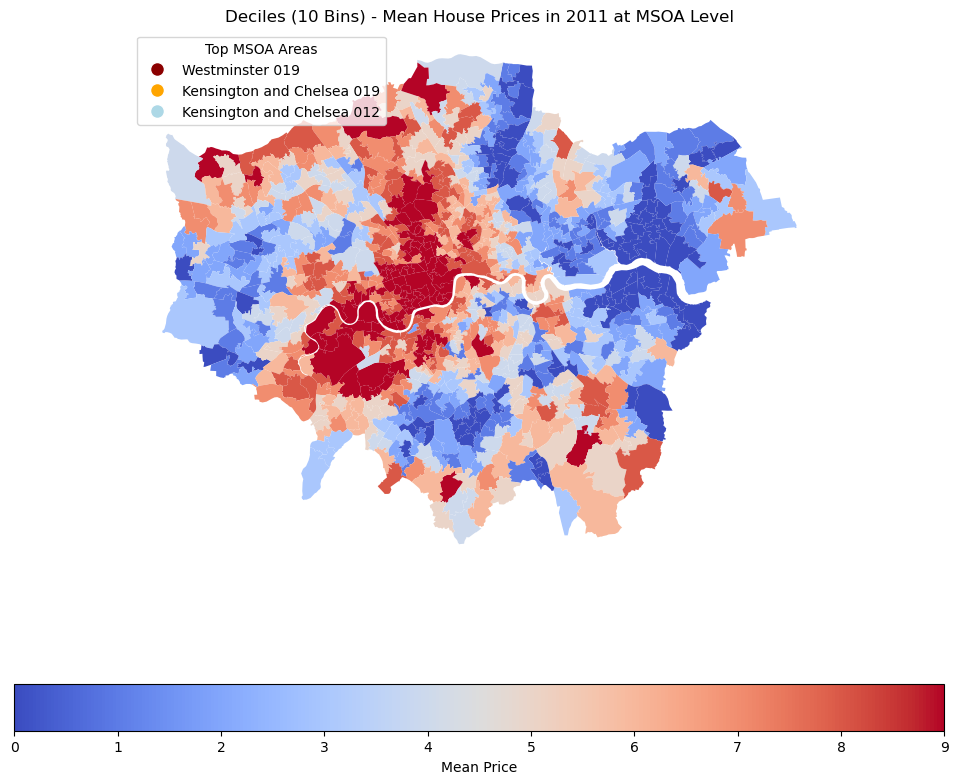

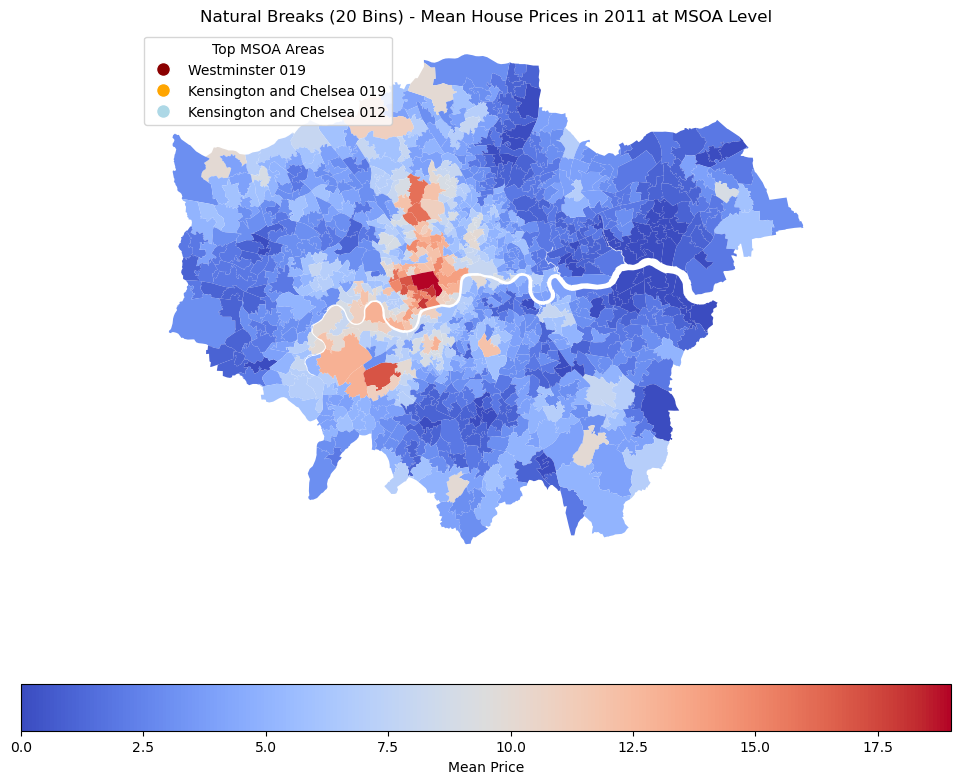

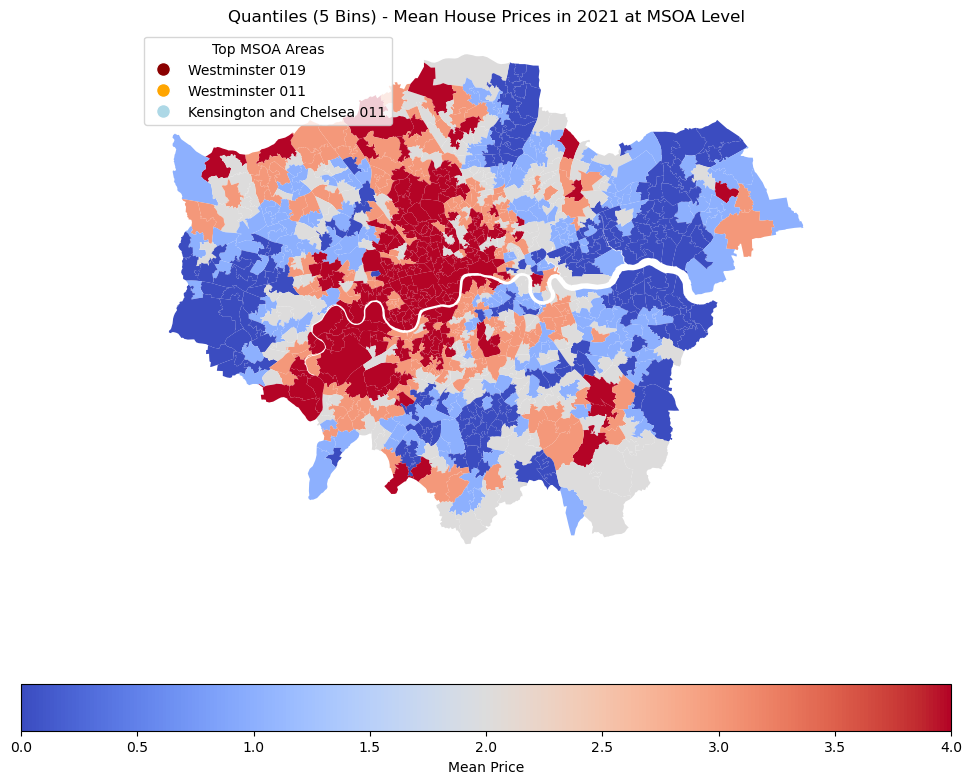

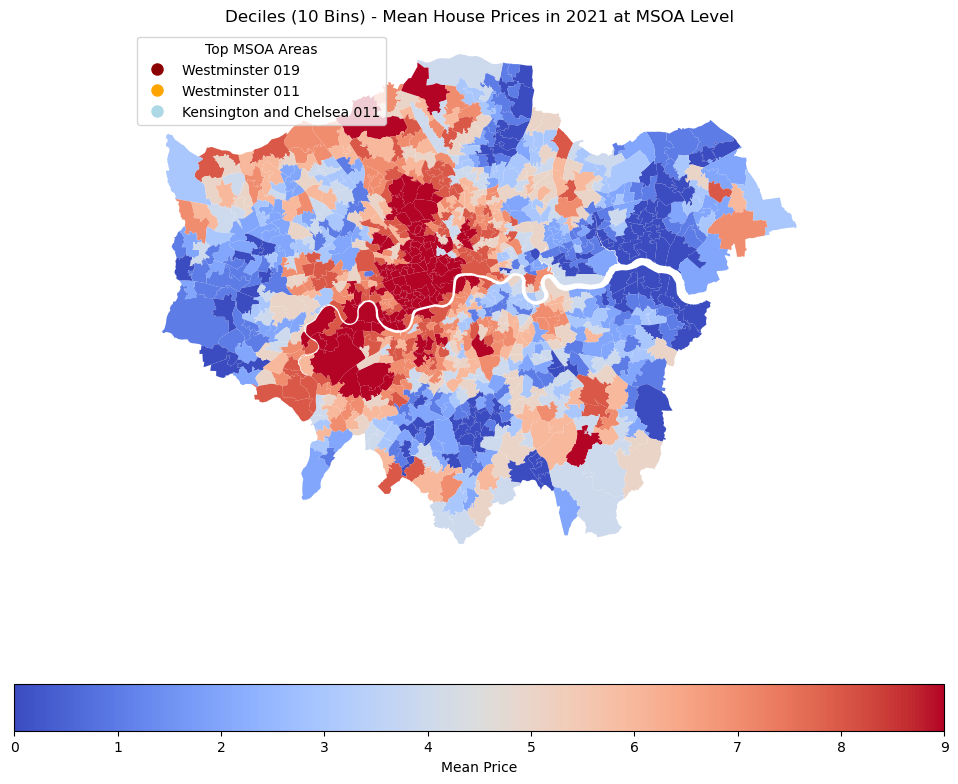

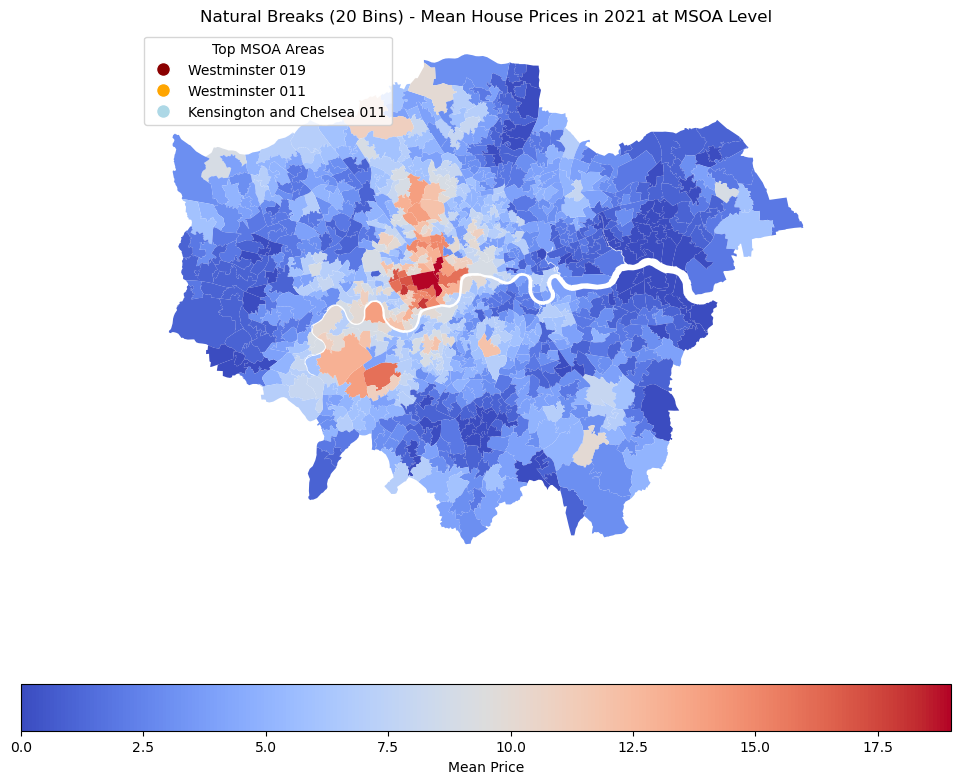

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mapclassify as mc

# 载入地理数据
gdf = gpd.read_file('MSOA_2011_London_gen_MHW.shp')

# 载入房价数据
price_data = pd.read_excel('finaldata.xlsx')

# 确保所有年份的数据都是数值型，并填充NaN为0
years = [2001, 2011, 2021]
for year in years:
    price_data[year] = pd.to_numeric(price_data[year], errors='coerce').fillna(0)

# 获取每个年份的前几个高价区名称
def get_top_msoas(price_data, year, n=3):
    return price_data.nlargest(n, year)[['MSOA name']].values.flatten()

# 对于每一个年份，创建地图
for year in years:
    year_data = price_data[['MSOA code', 'MSOA name', year]].rename(columns={year: 'Mean_Price'})
    merged_gdf = gdf.merge(year_data, left_on='MSOA11CD', right_on='MSOA code', how='left')

    # 不同的分段策略
    classifiers = {
        'Quantiles (5 Bins)': mc.Quantiles(merged_gdf['Mean_Price'].dropna(), k=5),
        'Deciles (10 Bins)': mc.Quantiles(merged_gdf['Mean_Price'].dropna(), k=10),
        'Natural Breaks (20 Bins)': mc.NaturalBreaks(merged_gdf['Mean_Price'].dropna(), k=20)
    }

    for method, classifier in classifiers.items():
        # 获取分类结果
        merged_gdf['cl'] = classifier.yb
        
        # 创建色阶图
        fig, ax = plt.subplots(1, 1, figsize=(12, 10))
        merged_gdf.plot(column='cl', cmap='coolwarm', legend=True, ax=ax,
                        missing_kwds={'color': 'lightgrey'},  # 未知数据显示为灰色
                        legend_kwds={'label': "Mean Price", 'orientation': "horizontal"})
    
        # 获取前3个高价区名称
        top_msoas = get_top_msoas(price_data, year, n=3)
    
        # 创建自定义图例
        custom_legend = [Line2D([0], [0], marker='o', color='w', label=top_msoas[0], 
                                markerfacecolor='darkred', markersize=10),
                         Line2D([0], [0], marker='o', color='w', label=top_msoas[1], 
                                markerfacecolor='orange', markersize=10),
                         Line2D([0], [0], marker='o', color='w', label=top_msoas[2], 
                                markerfacecolor='lightblue', markersize=10)]
    
        ax.legend(handles=custom_legend, title="Top MSOA Areas", loc='upper left')
    
        ax.set_title(f'{method} - Mean House Prices in {year} at MSOA Level')
        ax.set_axis_off()  # 关闭坐标轴显示
        plt.show()


In [10]:
import pandas as pd

# 读取数据文件
file_path = "log_finaldata.xlsx"
df = pd.read_excel(file_path)

# 显示列名
print(df.columns.tolist())


['MSOA code', 'Local authority code', 'Local authority name', 'MSOA name', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 'Unnamed: 26', '11disability', '11fertility', '11household', '11level4', '11populationdensity', '11employment', 'Unnamed: 33', '21disability', '21fertility', '21household', '21level4', '21populationdensity', '21employment', 'Unnamed: 40', 'Unnamed: 41', 'median2000', 'median2001', 'median2002', 'median2003', 'median2004', 'median2005', 'median2006', 'median2007', 'median2008', 'median2009', 'median2010', 'median2011', 'median2012', 'median2013', 'median2014', 'median2015', 'median2016', 'median2017', 'median2018', 'median2019', 'median2020', 'median2021', 'Log 2000', 'Log 2001', 'Log 2002', 'Log 2003', 'Log 2004', 'Log 2005', 'Log 2006', 'Log 2007', 'Log 2008', 'Log 2009', 'Log 2010', 'Log 2011', 'Log 2012', 'Log 2013', 'Log 2014', 'Log 2015', 'Log 2016', 'Log 2017', 'Log 2018', 'Lo

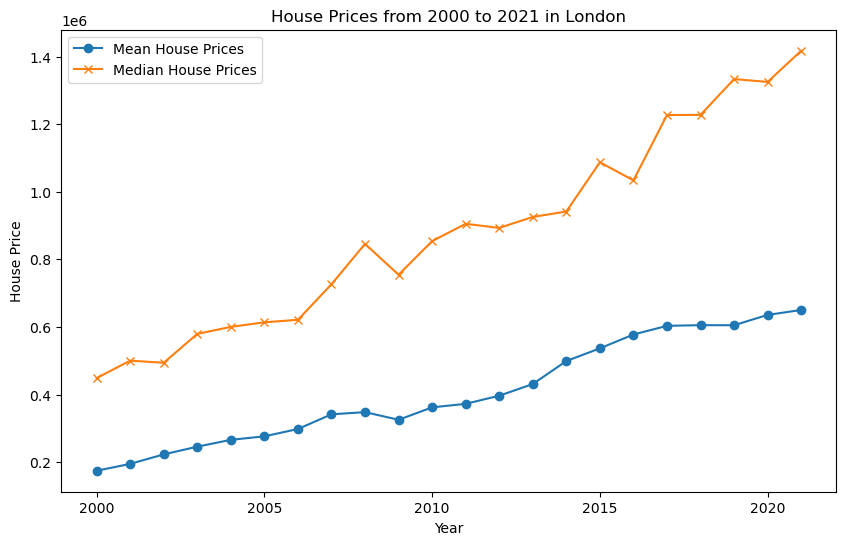

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = "log_finaldata.xlsx"
df = pd.read_excel(file_path)

# 提取2000年到2021年的平均房价数据
mean_years = list(range(2000, 2022))
mean_house_prices = df[mean_years].mean()

# 提取2000年到2021年的中位数房价数据
median_years = [f'median{year}' for year in mean_years]
median_house_prices = df[median_years].mean()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(mean_years, mean_house_prices, label='Mean House Prices', marker='o')
plt.plot(mean_years, median_house_prices, label='Median House Prices', marker='x')

# 添加标题和标签
plt.title('House Prices from 2000 to 2021 in London')
plt.xlabel('Year')
plt.ylabel('House Price')
plt.legend()

# 显示图形
plt.show()
